# Part 1: Low Level Vision (image > image)
> ## Week 1 ( Basic Image Processing Techniques)¶
>> **02- Linear Filtering (enhance image - blur & sharpen, edge detect, image contours, convolution)**

This is the curriculum for "Learn Computer Vision" by Siraj Raval on Youtube
https://github.com/llSourcell/Learn_Computer_Vision

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# helper function for plotting
def plot_me(i1,t1, i2,t2, i3,t3, i4,t4):
    f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
    ax1.imshow(i1)
    ax1.title.set_text(t1)
    ax2.imshow(i2)
    ax2.title.set_text(t2)
    ax3.imshow(i3)
    ax3.title.set_text(t3)
    ax4.imshow(i4)
    ax4.title.set_text(t4)

## 1. convolution

In [3]:
print("typical 3x3 kernel for blurring")
blurring_kernel = np.ones((3,3))*(1/9)
display(blurring_kernel)

typical 3x3 kernel for blurring


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

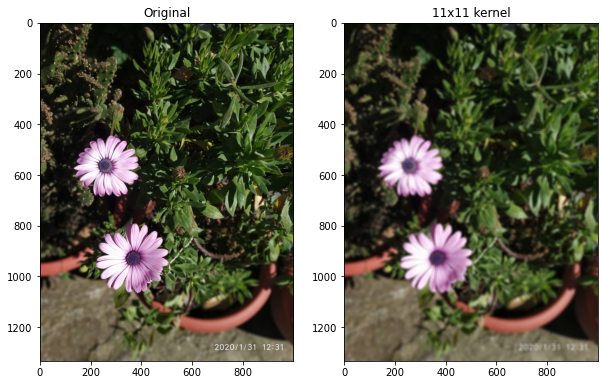

In [4]:
# convolve a kernel over the image
blurring_kernel = np.ones((11,11))*(1/121)

img = cv2.imread("flower.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blurred = cv2.filter2D(img, -1, blurring_kernel)

# save the image. We will need it for sharpening tasks
plt.imsave("flower_blurred.jpg", blurred)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.imshow(img)
ax1.title.set_text("Original")
ax2.imshow(blurred)
ax2.title.set_text("11x11 kernel")

**`low pass filter(LPF)`** helps in removing noise from images, blurring the images etc.

**`high pass filter(HPF)`** helps in finding edges in images.

## 2. image blurring/image smoothing

### 2.1 blurring using averaging 


In [5]:
def average_blurring(img):
    """reads input image and applies average blurring using given kernel size"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_3 = cv2.blur(img, (3,3))
    img_7 = cv2.blur(img, (7,7))
    img_11 = cv2.blur(img, (11,11))
    
    plot_me(img,"Original", img_3,"3x3 filter", img_7, "7x7 filter",img_11, "11x11 filter")

Wall time: 107 ms


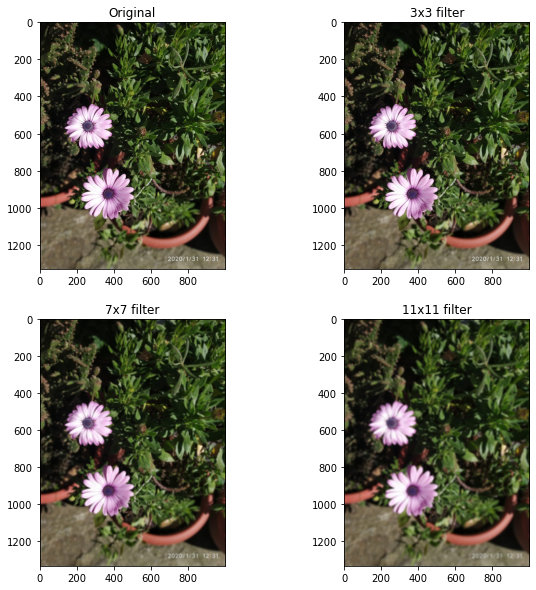

In [6]:
%%time
average_blurring("flower.jpg")

### 2.2 gaussian blurring


In [7]:
def gaussian_blurring(img):
    """reads input image and applies gaussian blurring using given kernel size"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # cv2.GaussianBlur(image, kernel_size, sigmaX, sigmaY
    # sigmaX and sigmaY are the std deviations in X and Y direction
    img_3 = cv2.GaussianBlur(img, (3,3),0,0)
    img_7 = cv2.GaussianBlur(img, (7,7),0,0)
    img_11 = cv2.GaussianBlur(img, (11,11),0,0)
    
    plot_me(img,"Original", img_3,"3x3 filter", img_7, "7x7 filter",img_11, "11x11 filter")

Wall time: 106 ms


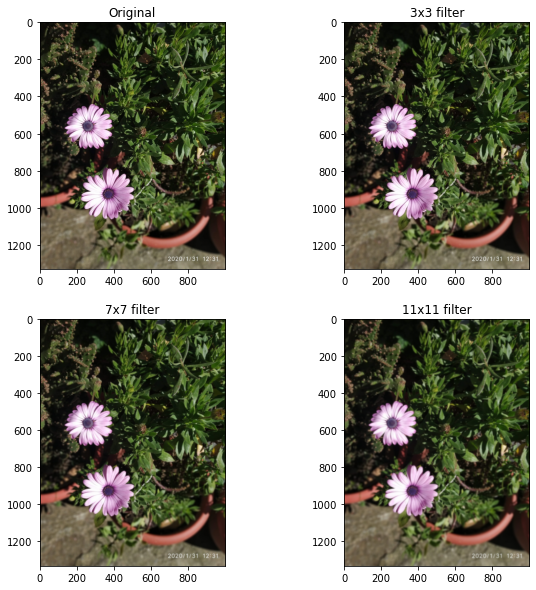

In [8]:
%%time
gaussian_blurring("flower.jpg")

### 2.3 median blurring


In [9]:
def median_blurring(img):
    """reads input image and applies median blurring using given kernel size"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # cv2.GaussianBlur(image, kernel_size, sigmaX, sigmaY
    img_3 = cv2.medianBlur(img, 3)
    img_7 = cv2.medianBlur(img, 7)
    img_11 = cv2.medianBlur(img, 11)
    
    plot_me(img,"Original", img_3,"3x3 filter", img_7, "7x7 filter",img_11, "11x11 filter")

Wall time: 293 ms


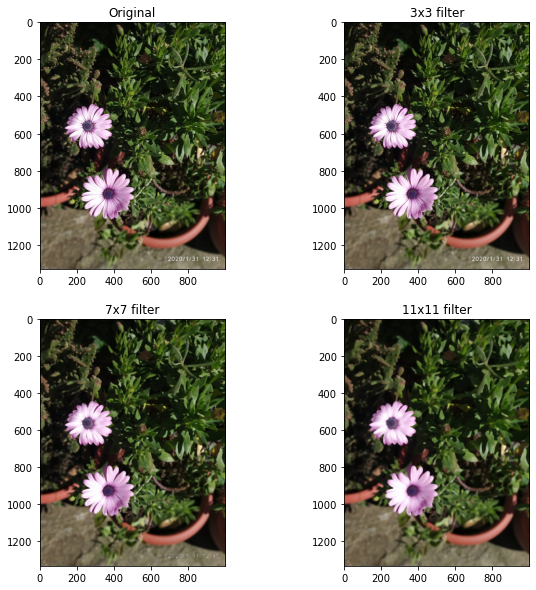

In [10]:
%%time
median_blurring("flower.jpg")

### 2.4 bilateral filtering



In [11]:
def bilateral_blurring(img):
    """reads input image and applies bilateral blurring using given kernel size"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace
    # d is diameter of each pixel neighborhood considered for filtering
    # sigmaColor- Filter sigma in the color space. A larger value of the parameter means that
    # farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, 
    # resulting in larger areas of semi-equal color.
    # sigmaSpace- Filter sigma in the coordinate space. A larger value of the parameter means 
    # thatfarther pixels will influence each other as long as their colors are close enough . 
    # When d\>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is
    # proportional to sigmaSpace.

    img_3 = cv2.bilateralFilter(img, 9, 75, 75)
    img_7 = cv2.bilateralFilter(img, 49, 75, 100)
    img_11 = cv2.bilateralFilter(img, 121, 75, 150)
    
    plot_me(img,"Original", img_3,"3x3 filter", img_7, "7x7 filter",img_11, "11x11 filter")

Wall time: 2.84 s


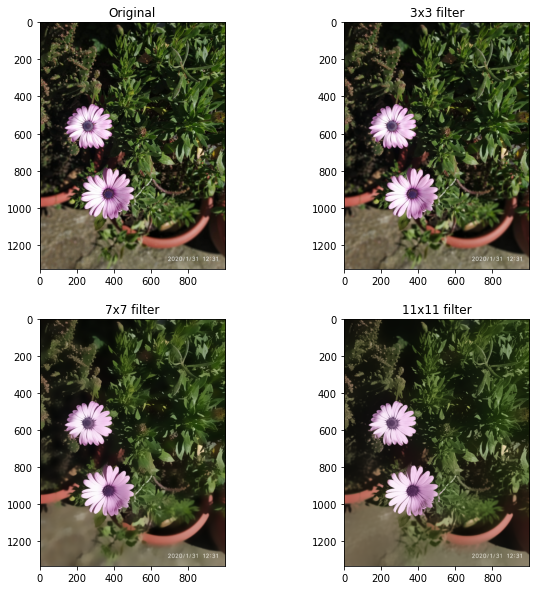

In [12]:
%%time
bilateral_blurring("flower.jpg")

## 3. image sharpening


In [13]:
print("typical 3x3 kernel for sharpening")
sharpening_kernel = np.array([[-1,-1,-1],[-1,9,-1], [-1,-1,-1]])
display(sharpening_kernel)

typical 3x3 kernel for sharpening


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

### 3.1 manual convolving using cv2.filter2D

Wall time: 64.1 ms


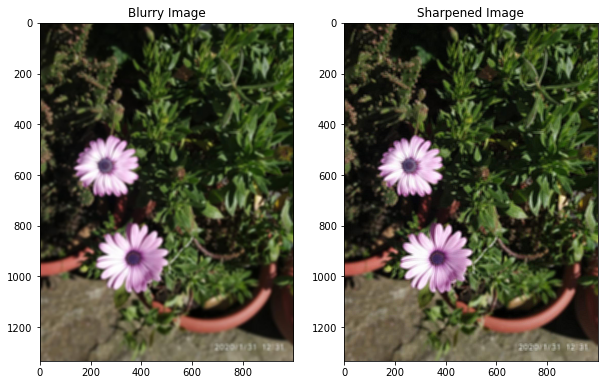

In [14]:
%%time
# use the blurred image from previous blurring tasks
img = cv2.imread("flower_blurred.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

sharpened = cv2.filter2D(img, -1, sharpening_kernel)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.imshow(img)
ax1.title.set_text("Blurry Image")
ax2.imshow(sharpened)
ax2.title.set_text("Sharpened Image")

### 3.2 adding and subtracting the pixel values using gaussian filter

Wall time: 88.1 ms


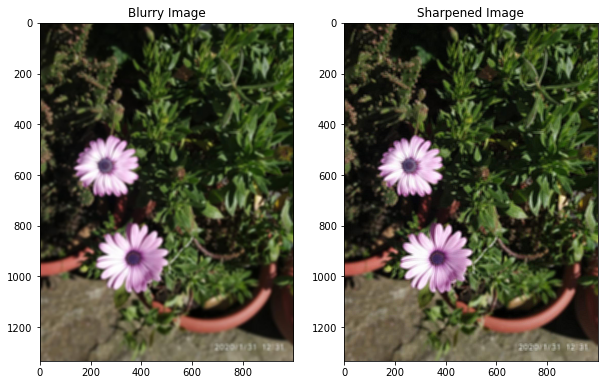

In [15]:
%%time
img = cv2.imread("flower_blurred.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(img,(3,3),0)
sharp = cv2.addWeighted(img,1.5,blur,-0.5,0)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.imshow(img)
ax1.title.set_text("Blurry Image")
ax2.imshow(sharpened)
ax2.title.set_text("Sharpened Image")

### 3.3 unsharp masking using laplacian 


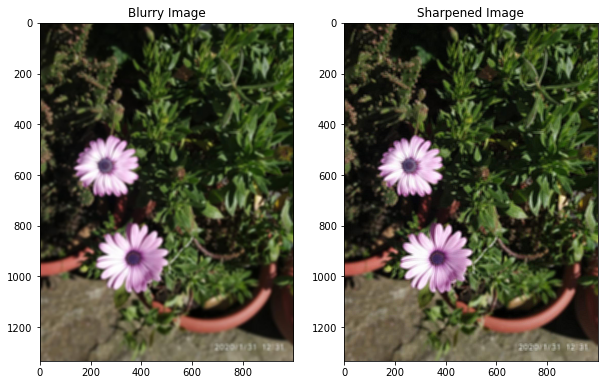

In [16]:
from scipy.ndimage.filters import median_filter

def unsharp_masking(img, sigma, strength):
    # Median filtering
    image_mf = median_filter(img, size=sigma)

    # Calculate the Laplacian
    lap = cv2.Laplacian(image_mf,cv2.CV_64F)

    # Calculate the sharpened image
    # strength is the amount of laplacian we want to add or take away
    sharp = img-strength*lap

    # Saturate the pixels in either direction
    img2 = np.clip(sharp, 0,255)

    return img2

# read image
img = cv2.imread("flower_blurred.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

sharp = np.zeros_like(img)
for i in range(3): # number of channels
    sharp[:,:,i] = unsharp_masking(img[:,:,i], 1, 2.8)
    
# plot
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.imshow(img)
ax1.title.set_text("Blurry Image")
ax2.imshow(sharpened)
ax2.title.set_text("Sharpened Image")

## 4. edge detection

In [17]:
print("#"*40)
print("typical kernel for laplacian")
display(np.array([[0,1,0], [1,-4,1],[0,1,0]]))
print("#"*40)
print("typical kernel for detecting diagonals")
display(np.array([[1,1,1], [1,-8,1],[1,1,1]]))

########################################
typical kernel for laplacian


array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

########################################
typical kernel for detecting diagonals


array([[ 1,  1,  1],
       [ 1, -8,  1],
       [ 1,  1,  1]])

### 4.1 opencv provides 3 types of Gradient filters of High-Pass filters Sobel, Scharr and Laplacian

In [18]:
def edge_detection(img):
    """reads input image and detects edges in given image"""
    img = cv2.imread(img)
    
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize=11)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0,1, ksize=11)
    
    plot_me(img, "Original", laplacian, "Laplacian", sobelx, "sobelX", sobely, "sobelY")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Wall time: 184 ms


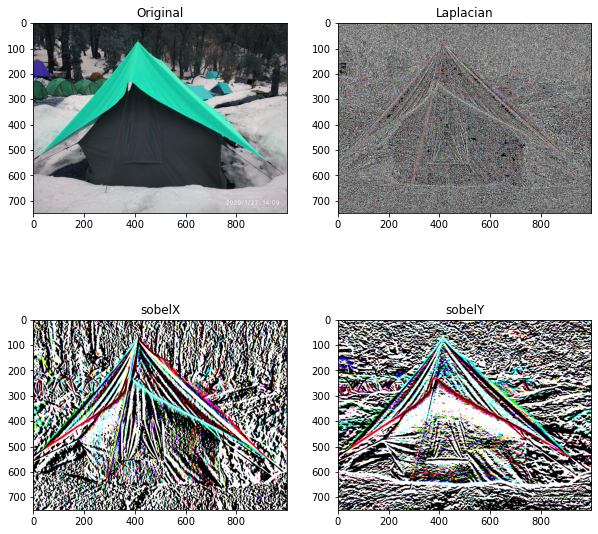

In [19]:
%%time
edge_detection("img4.jpg")

### 4.2 canny edge detection

In [20]:
def canny_edge_detection(img):
    """reads input image and detects edges using Canny"""
    img = cv2.imread(img)
       
    canny = cv2.Canny(img, 50,250)
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text("Original")
    ax2.imshow(canny, cmap='gray')
    ax2.title.set_text("canny")

Wall time: 37 ms


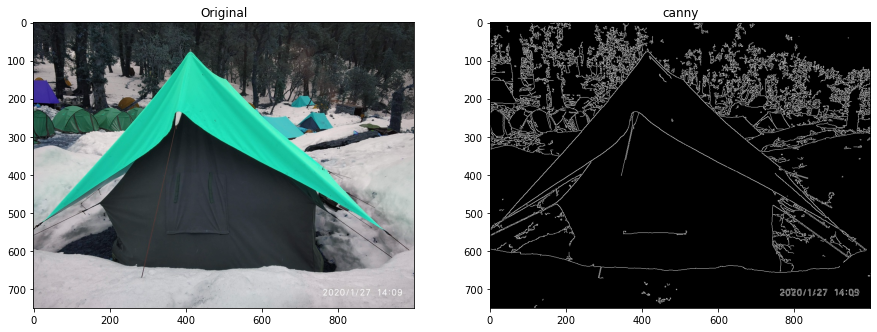

In [21]:
%%time
canny_edge_detection("img4.jpg")

## 5. image contour

In [22]:
def find_contours(img):
    """reads input image, finds and draws contours in image"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img1 = np.copy(img)
    
    # cv2.Canny can also be used in place of cv2.threshold
    ret, thresh = cv2.threshold(img, 100,200, 0)
    
    # cv2.findContours(source image, contour retrievel mode, contour approximation method)
    contours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #print("number of contours found", len(contours))
    im3 = cv2.drawContours(img, contours, -1, (0,255,0), 3)
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
    ax1.imshow(img1, cmap='gray')
    ax1.title.set_text("Original")
    ax2.imshow(im3, cmap='gray')
    ax2.title.set_text("contours")

Wall time: 55 ms


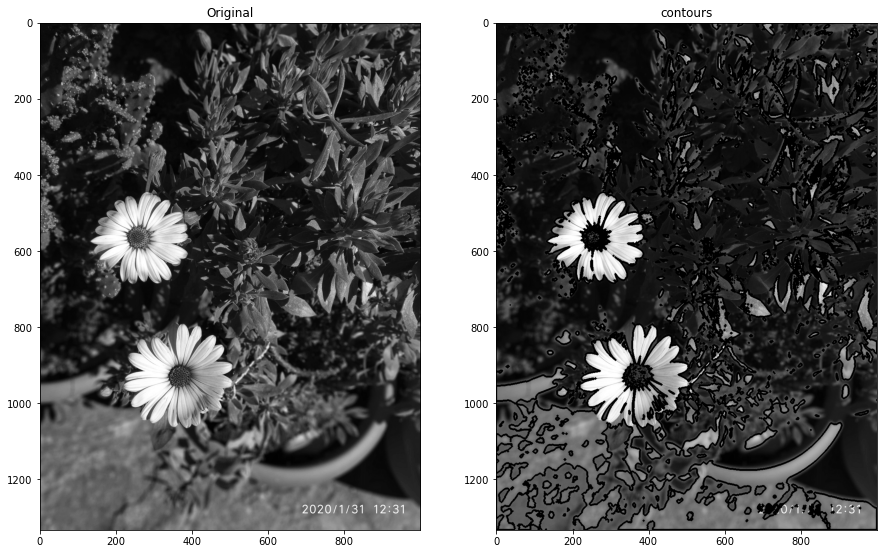

In [23]:
%%time
find_contours("flower.jpg")

## references:
- https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
- https://www.idtools.com.au/unsharp-masking-python-opencv/
- http://www.cs.umd.edu/~djacobs/CMSC426/ImageGradients.pdf
- https://github.com/opencv/opencv/blob/master/samples/python/edge.py
- https://en.wikipedia.org/wiki/Canny_edge_detector
- https://docs.opencv.org/master/d5/d0f/tutorial_py_gradients.html